In [41]:
import helpers
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as fnc

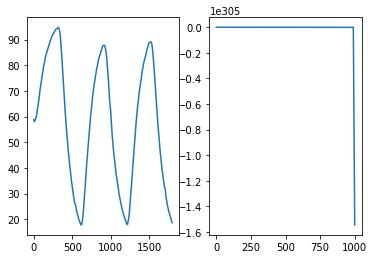

In [42]:
time_5,temp_5 = helpers.reader('FiveMinutes.txt')
plt.subplot(121)
plt.plot(time_5,temp_5)
plt.subplot(122)
plt.plot(time_5,fnc.ber(time_5))

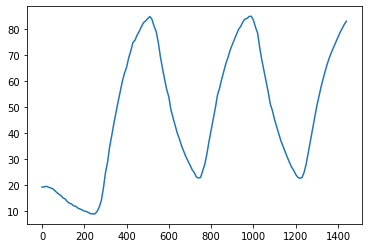

In [43]:
time_4,temp_4 = helpers.reader('FourMinutes.txt')
plt.plot(time_4,temp_4)

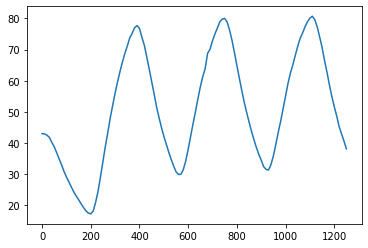

In [44]:
time_3,temp_3 = helpers.reader('ThreeMinutes.txt')
plt.plot(time_3,temp_3)

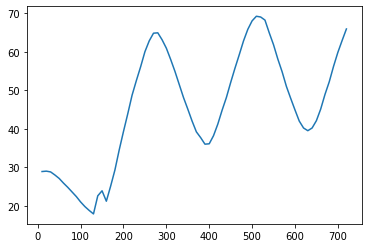

In [45]:
time_2,temp_2 = helpers.reader('TwoMinutes.txt')
plt.plot(time_2,temp_2)

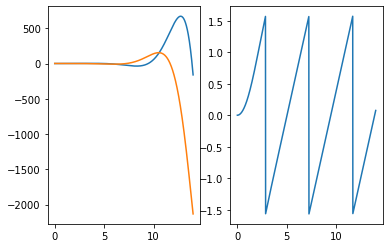

In [52]:
a = np.linspace(0,14,1000)
plt.subplot(121)
plt.plot(a,fnc.bei(a),a,fnc.ber(a))
plt.subplot(122)
plt.plot(a,np.arctan(fnc.bei(a)/fnc.ber(a)))